<a href="https://colab.research.google.com/github/2403a54098-boop/ML-LAB/blob/main/ml_5_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/gender_submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

In [ ]:
import numpy as np
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_train,y_train,y_test=train_test_split(
    x,y, test_size=0.2,random_state=42
)

In [ ]:
x_train

array([[1213],
       [1216],
       [1280],
       [ 948],
       [1045],
       [ 922],
       [ 964],
       [ 974],
       [1150],
       [1308],
       [ 901],
       [1283],
       [ 996],
       [1306],
       [1305],
       [ 931],
       [1304],
       [1270],
       [ 947],
       [1298],
       [1279],
       [1137],
       [1301],
       [1072],
       [1117],
       [1005],
       [1256],
       [1040],
       [1229],
       [ 970],
       [1102],
       [1259],
       [1033],
       [ 985],
       [1114],
       [1096],
       [ 971],
       [1193],
       [1140],
       [ 967],
       [ 962],
       [ 925],
       [1002],
       [1182],
       [ 965],
       [1153],
       [1257],
       [ 907],
       [ 969],
       [1177],
       [ 892],
       [ 911],
       [1160],
       [1285],
       [1261],
       [1167],
       [ 968],
       [1029],
       [1246],
       [1288],
       [ 917],
       [1269],
       [1060],
       [1169],
       [1067],
       [1243],
       [ 9

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced')


In [ ]:
from sklearn.model_selection import train_test_split

# Re-performing the split correctly to fix the sample size mismatch
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Fitting the model with a 1D array for labels to avoid warnings
model.fit(x_train, y_train.ravel())

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score,recall_score,f1_score


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5238095238095238

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred,labels=[1,0])
print("confusion matrix:")
print("TP FP")
print(" FN TN")
cm

confusion matrix:
TP FP
 FN TN


array([[18, 16],
       [24, 26]])

In [ ]:
precision = precision_score(y_test,y_pred,zero_division=0)
print(precision)

0.42857142857142855


In [ ]:
recall=recall_score(y_test,y_pred,zero_division=0)
print(recall)

0.5294117647058824


In [ ]:
f1=f1_score(y_test,y_pred,zero_division=0)
print(f1)
#

0.47368421052631576


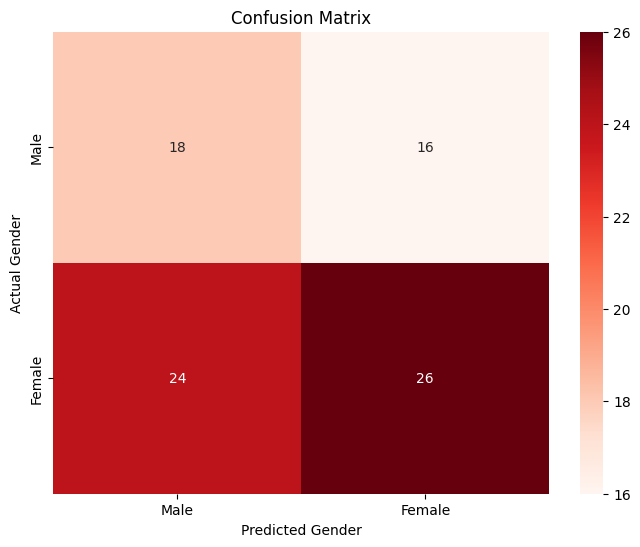

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred,labels=[1,0])
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=['Male','Female'],yticklabels=['Male','Female'])
plt.xlabel('Predicted Gender')
plt.ylabel('Actual Gender')
plt.title('Confusion Matrix')
plt.show()
#